<h1 align="center"><strong>Projet Data Science</h1> <h2 align="center">Livrable 3 : Captionning d'images</strong></h2> <h2 align="center"> <strong>CNN + GRU</strong></h2>

### Importation des bibliothèques

- **Importation de TensorFlow** : Bibliothèque utilisée pour construire et entraîner des modèles d'apprentissage automatique et d'apprentissage profond.
  
- **Importation de Matplotlib** : Module utilisé pour créer des visualisations graphiques, comme des graphiques et des images.

- **Importation de Scikit-learn** : Outils pour diviser les données en ensembles d'entraînement et de test, et pour mélanger les données.

- **Importation de bibliothèques supplémentaires** :
  - `collections` : Types de données spécialisés.
  - `random` : Génération de nombres aléatoires.
  - `re` : Outils pour les expressions régulières.
  - `numpy` : Calcul numérique et manipulation de tableaux.
  - `os` : Interaction avec le système d'exploitation.
  - `time` : Fonctions pour travailler avec le temps.
  - `json` : Manipulation de données au format JSON.
  - `glob` : Recherche de fichiers correspondant à un motif.
  - `PIL` : Manipulation d'images.
  - `pickle` : Sérialisation d'objets Python.
  - `tqdm` : Barre de progression pour les boucles.

- **Importation de ZipFile** : Permet de travailler avec des fichiers ZIP.

- **Message de confirmation** : Indique que toutes les bibliothèques ont été importées avec succès.

In [16]:
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import collections
import random
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
from tqdm import tqdm

print("Importation terminée.")

Importation terminée.


### Définition des chemins pour les fichiers d'annotations et d'images

- **Chemin du fichier d'annotations** : 
  - `annotation_folder` : Définit le chemin absolu du dossier contenant les fichiers d'annotations, en utilisant le répertoire courant (`os.path.abspath('.')`) et en ajoutant le sous-dossier `annotations/`.
  - `annotation_file` : Concatène le chemin du dossier d'annotations avec le nom du fichier d'annotations `captions_train2014.json`.

- **Chemin du dossier contenant les images à annoter** : 
  - `image_folder` : Définit le chemin relatif du dossier contenant les images à annoter.
  - `PATH` : Concatène le chemin absolu du répertoire courant avec le chemin relatif du dossier d'images.

- **Affichage des chemins** : 
  - Les deux lignes `print` affichent le chemin du fichier d'annotations et le chemin du dossier d'images, permettant de vérifier que les chemins sont correctement définis.

In [17]:
# Chemin du fichier d'annotations
annotation_folder = os.path.abspath('.')+"/annotations/"
annotation_file = annotation_folder+"captions_train2014.json"

# Chemin du dossier contenant les images à annoter
image_folder = '/train2014/'
PATH = os.path.abspath('.') + image_folder

print("Fichier d'annotation : ", annotation_file)
print("Le chemin PATH : ", PATH)

Fichier d'annotation :  c:\Users\Administrateur\Desktop\Datascience\DSCESI\Captionning/annotations/captions_train2014.json
Le chemin PATH :  c:\Users\Administrateur\Desktop\Datascience\DSCESI\Captionning/train2014/


### Lecture et préparation des annotations

- **Lecture du fichier d'annotation** : 
  - La ligne ouvre le fichier d'annotations (`captions_train2014.json`) en mode lecture (`'r'`). Le contenu de ce fichier est chargé dans la variable `annotations` au format JSON à l'aide de `json.load(f)`.

- **Grouper toutes les annotations ayant le même identifiant** : 
  - `image_path_to_caption` : Un dictionnaire par défaut est créé pour stocker les chemins d'images associés à leurs annotations.
  - La boucle `for` parcourt chaque annotation dans `annotations['annotations']` :
    - **Marquer le début et la fin de chaque annotation** : Chaque annotation est formatée pour inclure des balises `<start>` et `<end>`.
    - **Construire le chemin d'accès de l'image** : Le chemin de l'image est construit en utilisant le `PATH` et l'identifiant de l'image (`image_id`).
    - **Rajout du caption associé à image_path** : L'annotation formatée est ajoutée à la liste des captions pour chaque chemin d'image dans le dictionnaire.

- **Message de confirmation** : 
  - La ligne `print` affiche un message indiquant que la préparation des données est terminée.

In [18]:
with open(annotation_folder+"/captions_val2014.json", 'r') as f:
    annotations = json.load(f)
    
print("Annotations chargées.")

Annotations et instances chargées.


### Explication de la cellule

- **Lecture du fichier d'annotation** : 
  - La ligne ouvre le fichier d'annotations (`captions_train2014.json`) en mode lecture (`'r'`). Le contenu de ce fichier est chargé dans la variable `annotations` au format JSON à l'aide de `json.load(f)`.

- **Grouper toutes les annotations ayant le même identifiant** : 
  - `image_path_to_caption` : Un dictionnaire par défaut est créé pour stocker les chemins d'images associés à leurs annotations.
  - La boucle `for` parcourt chaque annotation dans `annotations['annotations']` :
    - **Marquer le début et la fin de chaque annotation** : Chaque annotation est formatée pour inclure des balises `<start>` et `<end>`.
    - **Construire le chemin d'accès de l'image** : Le chemin de l'image est construit en utilisant le `PATH` et l'identifiant de l'image (`image_id`).
    - **Rajout du caption associé à image_path** : L'annotation formatée est ajoutée à la liste des captions pour chaque chemin d'image dans le dictionnaire.

- **Message de confirmation** : 
  - La ligne `print` affiche un message indiquant que la préparation des données est terminée.

In [19]:
# Lecture du fichier d'annotation
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

# Grouper toutes les annotations ayant le meme identifiant.
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
    # marquer le debut et la fin de chaque annotation
    caption = f"<start> {val['caption']} <end>"
    # L'identifiant d'une image fait partie de son chemin d'accès
    image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
    # Rajout du caption associé à image_path
    image_path_to_caption[image_path].append(caption)
    
print("Préparation terminée.")

Préparation terminée.


### Sélection des premières images

- **Prendre les premières images seulement** : 
  - `image_paths` : Crée une liste des chemins d'images à partir des clés du dictionnaire `image_path_to_caption`.
  - `random.shuffle(image_paths)` : Mélange aléatoirement la liste des chemins d'images pour garantir une sélection aléatoire.

- **Sélectionner un sous-ensemble d'images** : 
  - `train_image_paths` : Prend les 10 000 premiers chemins d'images de la liste mélangée pour les utiliser dans l'entraînement.

- **Affichage du nombre d'images utilisées** : 
  - La ligne `print` affiche le nombre total d'images sélectionnées pour l'entraînement.

In [20]:
# Prendre les premières images seulement
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)
train_image_paths = image_paths[:10000]

print("Nombres d'images utilisées :", len(train_image_paths))

Nombres d'images utilisées : 10000


In [21]:
# Liste de toutes les annotations
train_captions = []
# Liste de tous les noms de fichiers des images dupliquées (en nombre d'annotations par image)
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    # Rajout de caption_list dans train_captions
    train_captions.extend(caption_list)
    # Rajout de image_path dupliquée len(caption_list) fois
    img_name_vector.extend([image_path] * len(caption_list))
    
print("Préparation terminée.")

Préparation terminée.


### Affichage des informations sur les captions et les images

- **Affichage des longueurs des listes** : 
  - La première ligne `print(len(train_captions), len(img_name_vector))` affiche le nombre total de captions dans `train_captions` et le nombre total de noms de fichiers d'images dans `img_name_vector`. Cela permet de vérifier que les données sont correctement préparées et que chaque image a le bon nombre de captions associés.

- **Affichage de la première caption** : 
  - La deuxième ligne `print(train_captions[0])` affiche la première caption de la liste `train_captions`, permettant de visualiser un exemple de caption.

- **Affichage de la première image** : 
  - La dernière ligne `Image.open(img_name_vector[0])` ouvre et affiche la première image associée à la première caption, permettant de vérifier que l'image est correctement chargée.

50026 50026
<start> Some guys playing in the water with a disc. <end>


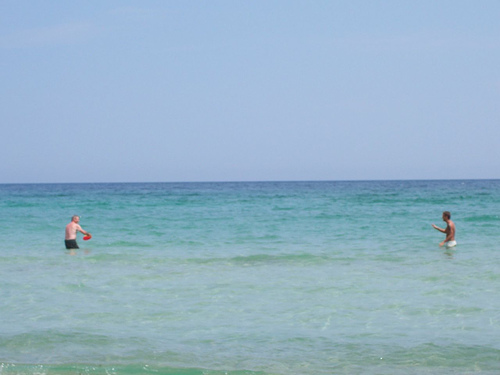

In [22]:
print(len(train_captions), len(img_name_vector))
print(train_captions[0])
Image.open(img_name_vector[0])

### Téléchargement et configuration du modèle InceptionV3

- **Téléchargement du modèle InceptionV3 pré-entraîné** : 
  - La ligne `image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')` télécharge le modèle InceptionV3 pré-entraîné, sans la couche de classification supérieure (`include_top=False`), et utilise les poids pré-entraînés sur le jeu de données ImageNet.

- **Création d'une variable pour l'entrée du modèle** : 
  - `new_input = image_model.input` définit l'entrée du modèle pour le prétraitement des images.

- **Récupération de la dernière couche cachée** : 
  - `hidden_layer = image_model.layers[-1].output` récupère la sortie de la dernière couche cachée du modèle, qui contient une représentation compacte des images.

- **Création du modèle d'extraction des caractéristiques** : 
  - `image_features_extract_model = tf.keras.Model(new_input, hidden_layer)` crée un nouveau modèle qui calcule une représentation dense des images en utilisant InceptionV3.

- **Message de confirmation** : 
  - La ligne `print("Modèle téléchargé.")` affiche un message indiquant que le modèle a été téléchargé avec succès.

### Principe d'extraction de feature d'une image

<img src="https://cdn.discordapp.com/attachments/1026606515961999380/1298666795045093478/inceptionv3.png?ex=671a6534&is=671913b4&hm=e4ad02fb513700509bdae02257a333f8ba33231ba971cc66b4db222777ef8bbd&">

In [23]:
# Telechargement du modèle InceptionV3 pré-entrainé avec la cassification sur ImageNet
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
# Creation d'une variable qui sera l'entrée du nouveau modèle de pre-traitement d'images
new_input = image_model.input
# récupérer la dernière couche caché qui contient l'image en representation compacte
hidden_layer = image_model.layers[-1].output

# Modèle qui calcule une representation dense des images avec InceptionV3
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

print("Modèle téléchargé.")


87910968/87910968 [==============================] - 4s 0us/step
Modèle téléchargé.


### Principe d'extraction de feature d'une image

<img src="https://imgur.com/wWHWbQt.jpg">

### Définition de la fonction `load_image`

- **Fonction `load_image`** : Cette fonction prend en entrée le chemin d'une image et retourne un couple contenant l'image traitée ainsi que son chemin d'accès.
  
- **Traitements effectués par la fonction** :
  1. **Chargement du fichier** : La ligne `img = tf.io.read_file(image_path)` lit le fichier correspondant au chemin d'accès `image_path`.
  2. **Décodage de l'image** : La ligne `img = tf.image.decode_jpeg(img, channels=3)` décode l'image en format RGB.
  3. **Redimensionnement de l'image** : La ligne `img = tf.image.resize(img, (299, 299))` redimensionne l'image à la taille (299, 299), qui est la taille d'entrée requise pour le modèle InceptionV3.
  4. **Normalisation des pixels** : La ligne `img = tf.keras.applications.inception_v3.preprocess_input(img)` normalise les pixels de l'image entre -1 et 1, ce qui est nécessaire pour le traitement par le modèle.

- **Retour de la fonction** : La fonction retourne l'image traitée et son chemin d'accès.

- **Message de confirmation** : La ligne `print('load_image défini.')` affiche un message indiquant que la fonction `load_image` a été définie avec succès.

In [24]:
def load_image(image_path):
    # Lecture du fichier image
    img = tf.io.read_file(image_path)
    # Decodage de l'image en RGB
    img = tf.image.decode_jpeg(img, channels=3)
    # Redimensionnement de l'image en taille (299, 299)
    img = tf.image.resize(img, (299, 299))
    # Normalisation des pîxels de l'image entre -1 et 1
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

print('load_image défini.')

load_image défini.


### Prétraitement des images

- **Importation de tqdm** : 
  - La ligne `from tqdm import tqdm` importe la bibliothèque `tqdm`, qui est utilisée pour afficher une barre de progression lors de l'itération sur des objets.

- **Prétraitement des images** : 
  - `encode_train = sorted(set(img_name_vector))` : Crée une liste triée des noms d'images uniques à partir de `img_name_vector`.

- **Création d'un dataset TensorFlow** : 
  - `image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)` : Crée une instance de `tf.data.Dataset` à partir des noms des images.
  - `image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)` : Applique la fonction `load_image` à chaque élément du dataset pour le prétraitement, puis divise les données en batches de taille 16.

- **Parcours du dataset** : 
  - La boucle `for img, path in tqdm(image_dataset):` parcourt le dataset batch par batch, affichant une barre de progression.

- **Prétraitement du batch** : 
  - `batch_features = image_features_extract_model(img)` : Applique le modèle d'extraction de caractéristiques pour obtenir les représentations des images.
  - `batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))` : Redimensionne le batch de caractéristiques pour le rendre compatible avec les étapes suivantes.

- **Stockage des caractéristiques** : 
  - La boucle `for bf, p in zip(batch_features, path):` parcourt chaque caractéristique de batch et son chemin associé.
  - `path_of_feature = p.numpy().decode("utf-8")` : Décode le chemin de l'image en chaîne de caractères.
  - `np.save(path_of_feature, bf.numpy())` : Sauvegarde les caractéristiques de l'image dans un fichier `.npy` associé à son chemin.

In [25]:
from tqdm import tqdm

# Pré-traitement des images
# Prendre les noms des images
encode_train = sorted(set(img_name_vector))

# Creation d'une instance de "tf.data.Dataset" partant des noms des images 
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
# Division du données en batchs après application du pré-traitement fait par load_image
image_dataset = image_dataset.map(
    load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

# Parcourir le dataset batch par batch pour effectuez le pré-traitement d'InceptionV3
for img, path in tqdm(image_dataset):
    # Pré-traitement du batch (de taille (16,8,8,2048)) courant par InceptionV3 
    batch_features = image_features_extract_model(img)
    # Resize du batch de taille (16,8,8,2048) en taille (16,64,2048)
    batch_features = tf.reshape(batch_features,
                                (batch_features.shape[0], -1, batch_features.shape[3]))
    # Parcourir le batch courant et stocker le chemin ainsi que le batch avec np.save()
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        # (chemin de l'image associe a sa nouvelle representation , representation de l'image)
        np.save(
            path_of_feature, bf.numpy()
        )

100%|██████████| 625/625 [10:29<00:00,  1.01s/it]


### Prétraitement des annotations et création du tokenizer

- **Fonction pour trouver la taille maximale** : 
  - `def calc_max_length(tensor):` : Cette fonction calcule la longueur maximale des séquences dans le tensor donné, ce qui est utile pour le traitement des annotations.

- **Choisir les 5000 mots les plus fréquents du vocabulaire** : 
  - `top_k = 5000` : Définit le nombre maximum de mots à conserver dans le vocabulaire.

- **Création du tokenizer** : 
  - `tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>", filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')` : Crée une instance de la classe `Tokenizer` pour le prétraitement de texte, en spécifiant le nombre de mots à conserver, un token pour les mots inconnus, et les filtres pour nettoyer le texte.

- **Construction du vocabulaire** : 
  - `tokenizer.fit_on_texts(train_captions)` : Construit le vocabulaire en se basant sur la liste des captions d'entraînement.

- **Création du token de remplissage** : 
  - `tokenizer.word_index['<pad>'] = 0` et `tokenizer.index_word[0] = '<pad>'` : Définit le token de remplissage pour égaliser la longueur des annotations.

- **Création des vecteurs de tokens** : 
  - `train_seqs = tokenizer.texts_to_sequences(train_captions)` : Convertit les captions en listes de tokens entiers.

- **Remplissage des vecteurs** : 
  - `cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')` : Remplit chaque vecteur jusqu'à la longueur maximale des annotations, en ajoutant des tokens de remplissage à la fin.

- **Calcul de la longueur maximale** : 
  - `max_length = calc_max_length(train_seqs)` : Calcule la longueur maximale des séquences, utilisée pour stocker les poids d'attention.

- **Conversion du tokenizer en chaîne JSON** : 
  - `tokenizer_json = tokenizer.to_json()` : Convertit le tokenizer en une chaîne JSON.

- **Sauvegarde du tokenizer** : 
  - La ligne `with open('tokenizer.json', 'w', encoding='utf-8') as f:` ouvre un fichier pour écrire, et `f.write(json.dumps(tokenizer_json, ensure_ascii=False))` sauvegarde la chaîne JSON dans un fichier.

- **Message de confirmation** : 
  - La ligne `print('Annotations prétraités.')` affiche un message indiquant que les annotations ont été prétraitées avec succès.

### Représentation du principe de Tokenisation de manière encoder

<img src='https://lena-voita.github.io/resources/lectures/word_emb/lookup_table.gif'>

In [26]:
# Trouver la taille maximale 
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

# Chosir les 5000 mots les plus frequents du vocabulaire
top_k = 5000
#La classe Tokenizer permet de faire du pre-traitement de texte pour reseau de neurones 
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
# Construit un vocabulaire en se basant sur la liste train_captions
tokenizer.fit_on_texts(train_captions)

# Créer le token qui sert à remplir les annotations pour egaliser leurs longueur
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

# Creation des vecteurs(liste de token entiers) à partir des annotations (liste de mots)
train_seqs = tokenizer.texts_to_sequences(train_captions)

# Remplir chaque vecteur à jusqu'à la longueur maximale des annotations
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

# Calcule la longueur maximale qui est utilisée pour stocker les poids d'attention 
# Elle servira plus tard pour l'affichage lors de l'évaluation
max_length = calc_max_length(train_seqs)

# Convert the tokenizer to a JSON string
tokenizer_json = tokenizer.to_json()

# Save the JSON string to a file
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
    
print('Annotations prétraités.')

Annotations prétraités.


### Création des datasets de formation et de validation

- **Création d'un dictionnaire associant les chemins des images aux annotations** : 
  - `img_to_cap_vector = collections.defaultdict(list)` : Crée un dictionnaire par défaut pour stocker les chemins d'images associés à leurs annotations. Les images sont dupliquées car il y a plusieurs annotations par image.
  - La ligne `print(len(img_name_vector), len(cap_vector))` affiche le nombre total de noms de fichiers d'images et le nombre total de captions.

- **Remplissage du dictionnaire** : 
  - La boucle `for img, cap in zip(img_name_vector, cap_vector):` parcourt les chemins d'images et les captions, ajoutant chaque caption à la liste correspondante dans le dictionnaire `img_to_cap_vector`.

- **Création des datasets de formation et de validation** : 
  - `img_keys = list(img_to_cap_vector.keys())` : Prend les clés (noms des fichiers d'images) du dictionnaire, qui ne seront pas dupliquées.
  - `random.shuffle(img_keys)` : Mélange aléatoirement les clés.
  - `slice_index = int(len(img_keys)*0.8)` : Calcule l'indice pour diviser les données en ensembles d'entraînement et de validation.
  - `img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]` : Divise les clés en ensembles d'entraînement (80%) et de validation (20%).

- **Construction du jeu d'entraînement** : 
  - Les listes `img_name_train` et `cap_train` sont initialisées pour stocker les chemins d'images et les captions d'entraînement.
  - La boucle `for imgt in img_name_train_keys:` parcourt les clés d'entraînement, dupliquant chaque image en fonction du nombre d'annotations associées.

- **Construction du jeu de test** : 
  - Les listes `img_name_val` et `cap_val` sont initialisées pour stocker les chemins d'images et les captions de validation.
  - La boucle `for imgv in img_name_val_keys:` parcourt les clés de validation, dupliquant chaque image en fonction du nombre d'annotations associées.

- **Affichage des longueurs des jeux de données** : 
  - La ligne `len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)` affiche le nombre total d'images et de captions dans les jeux d'entraînement et de validation.

In [27]:
img_to_cap_vector = collections.defaultdict(list)
# Creation d'un dictionnaire associant les chemins des images avec (fichier .npy) aux annotationss
# Les images sont dupliquées car il y a plusieurs annotations par image
print(len(img_name_vector), len(cap_vector))
for img, cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)

"""
Création des datasets de formation et de validation en utilisant 
un fractionnement 80-20 de manière aléatoire
"""
# Prendre les clés (noms des fichiers d'images traites), *celles-ci ne seront pas dupliquées*
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys) # Mélanger les clés
# Diviser des indices en entrainement et test
slice_index = int(len(img_keys)*0.8)
# divide into train and validation
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

"""
Les jeux d'entrainement et de tests sont sous forme
de listes contenants les mappings :(image prétraitée ---> jeton d'annotation(mot) )
"""

# Boucle pour construire le jeu d'entrainement
img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    # Duplication des images en le nombre d'annotations par image
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

# Boucle pour construire le jeu de test
img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    # Duplication des images en le nombre d'annotations par image
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])

len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

50026 50026


(40020, 40020, 10006, 10006)

### Configuration du dataset pour l'entraînement

- **Paramètres de configuration** : 
  - `BATCH_SIZE = 64` : Définit la taille du batch pour l'entraînement.
  - `BUFFER_SIZE = 1000` : Définit la taille du buffer pour mélanger les données.
  - `embedding_dim = 256` : Définit la dimension des vecteurs d'embedding.
  - `units = 512` : Définit la taille de la couche cachée dans le RNN.
  - `vocab_size = top_k + 1` : Définit la taille du vocabulaire, incluant un token pour le remplissage.
  - `num_steps = len(img_name_train) // BATCH_SIZE` : Calcule le nombre total d'étapes d'entraînement.

- **Forme des vecteurs extraits** : 
  - `features_shape = 2048` : La forme du vecteur extrait à partir d'InceptionV3.
  - `attention_features_shape = 64` : Représente la forme des caractéristiques d'attention.

- **Fonction pour charger les fichiers numpy** : 
  - `def map_func(img_name, cap):` : Cette fonction charge les fichiers `.npy` des images prétraitées.
  - `img_tensor = np.load(img_name.decode('utf-8')+'.npy')` : Charge le fichier numpy correspondant au chemin d'image.

- **Création d'un dataset de Tensors** : 
  - `dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))` : Crée un dataset à partir des chemins d'images et des captions.

- **Chargement des fichiers numpy** : 
  - `dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)` : Applique la fonction `map_func` pour charger les fichiers numpy, en utilisant le parallélisme pour améliorer les performances.

- **Mélange et division des données en batches** : 
  - `dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)` : Mélange les données et les divise en batches de taille définie.
  - `dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)` : Précharge les données pour améliorer l'efficacité.

- **Message de confirmation** : 
  - La ligne `print('Dataset configuré.')` affiche un message indiquant que le dataset a été configuré avec succès.

In [28]:
BATCH_SIZE = 64 # taille du batch
BUFFER_SIZE = 1000 # taille du buffer pour melanger les donnes
embedding_dim = 256
units = 512 # Taille de la couche caché dans le RNN
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE

# La forme du vecteur extrait à partir d'InceptionV3 est (64, 2048)
# Les deux variables suivantes representent la forme de ce vecteur
features_shape = 2048
attention_features_shape = 64

# Fonction qui charge les fichiers numpy des images prétraitées
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

# Creation d'un dataset de "Tensor"s (sert à representer de grands dataset)
# Le dataset est cree a partir de "img_name_train" et "cap_train"
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# L'utilisation de map permet de charger les fichiers numpy (possiblement en parallèle)
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
    map_func, [item1, item2], [tf.float32, tf.int32]),
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Melanger les donnees et les diviser en batchs
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

print('Dataset configuré.')

Dataset configuré.


### Définition de la classe `CNN_Encoder`

- **Classe `CNN_Encoder`** : Cette classe hérite de `tf.keras.Model` et est utilisée pour encoder les caractéristiques des images prétraitées.

- **Constructeur `__init__`** : 
  - `def __init__(self, embedding_dim):` : Initialise l'encodeur avec une dimension d'embedding spécifiée.
  - `super(CNN_Encoder, self).__init__()` : Appelle le constructeur de la classe parente.
  - `self.fc = tf.keras.layers.Dense(embedding_dim)` : Crée une couche dense qui transformera les caractéristiques d'entrée en un vecteur d'embedding de dimension `embedding_dim`.

- **Méthode `call`** : 
  - `def call(self, x):` : Définit la méthode d'appel pour le modèle, qui sera exécutée lors de la propagation avant.
  - `x = self.fc(x)` : Applique la couche dense aux caractéristiques d'entrée.
  - `x = tf.nn.relu(x)` : Applique la fonction d'activation ReLU pour introduire de la non-linéarité.
  - `return x` : Retourne les caractéristiques encodées.

- **Message de confirmation** : 
  - La ligne `print('Encodeur CNN configuré.')` affiche un message indiquant que l'encodeur CNN a été configuré avec succès.

In [29]:
class CNN_Encoder(tf.keras.Model):
    # Comme les images sont déjà prétraités par InceptionV3 est représenté sous forme compacte
    # L'encodeur CNN ne fera que transmettre ces caractéristiques à une couche dense
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # forme après fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

print('Encodeur CNN configuré.')

Encodeur CNN configuré.


### Définition de la classe `BahdanauAttention`

- **Classe `BahdanauAttention`** : Cette classe hérite de `tf.keras.Model` et implémente le mécanisme d'attention de Bahdanau, qui est utilisé pour pondérer les caractéristiques des images lors de la génération de captions.

- **Constructeur `__init__`** : 
  - `def __init__(self, units):` : Initialise le mécanisme d'attention avec un nombre spécifié d'unités.
  - `super(BahdanauAttention, self).__init__()` : Appelle le constructeur de la classe parente.
  - `self.W1 = tf.keras.layers.Dense(units)` : Crée une couche dense pour transformer les caractéristiques d'entrée.
  - `self.W2 = tf.keras.layers.Dense(units)` : Crée une autre couche dense pour transformer l'état caché.
  - `self.V = tf.keras.layers.Dense(1)` : Crée une couche dense pour générer le score d'attention.

- **Méthode `call`** : 
  - `def call(self, features, hidden):` : Définit la méthode d'appel pour le modèle, qui sera exécutée lors de la propagation avant.
  - `hidden_with_time_axis = tf.expand_dims(hidden, 1)` : Ajoute une dimension à l'état caché pour le rendre compatible avec les caractéristiques d'entrée.
  - `attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))` : Calcule les scores d'attention en combinant les caractéristiques et l'état caché.
  - `score = self.V(attention_hidden_layer)` : Génère un score non normalisé pour chaque caractéristique de l'image.
  - `attention_weights = tf.nn.softmax(score, axis=1)` : Applique la fonction softmax pour obtenir les poids d'attention normalisés.
  - `context_vector = attention_weights * features` : Calcule le vecteur de contexte en pondérant les caractéristiques par les poids d'attention.
  - `context_vector = tf.reduce_sum(context_vector, axis=1)` : Réduit le vecteur de contexte en une seule dimension.

- **Retourne** : 
  - La méthode retourne le vecteur de contexte et les poids d'attention.

- **Message de confirmation** : 
  - La ligne `print("Mécanisme d'attention configuré.")` affiche un message indiquant que le mécanisme d'attention a été configuré avec succès.

In [30]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # features(CNN_encoder output) forme == (batch_size, 64, embedding_dim)

        # forme de la couche cachée == (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                             self.W2(hidden_with_time_axis)))

        # Cela vous donne un score non normalisé pour chaque caractéristique de l'image.
        score = self.V(attention_hidden_layer)

        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

print("Mécanisme d'attention configuré.")

Mécanisme d'attention configuré.


### Définition de la classe `RNN_Decoder`

- **Classe `RNN_Decoder`** : Cette classe hérite de `tf.keras.Model` et est utilisée pour décoder les séquences de mots à partir des caractéristiques d'image et de l'état caché.

- **Constructeur `__init__`** : 
  - `def __init__(self, embedding_dim, units, vocab_size):` : Initialise le décodeur avec les dimensions d'embedding, le nombre d'unités et la taille du vocabulaire.
  - `super(RNN_Decoder, self).__init__()` : Appelle le constructeur de la classe parente.
  - `self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)` : Crée une couche d'embedding pour transformer les indices de mots en vecteurs d'embedding.
  - `self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')` : Crée une couche GRU qui renvoie à la fois les séquences et l'état caché.
  - `self.fc1 = tf.keras.layers.Dense(self.units)` : Couche dense qui prend en entrée la sortie du GRU.
  - `self.fc2 = tf.keras.layers.Dense(vocab_size)` : Dernière couche dense qui produit les prédictions de vocabulaire.
  - `self.attention = BahdanauAttention(self.units)` : Initialise le mécanisme d'attention.

- **Méthode `call`** : 
  - `def call(self, x, features, hidden):` : Définit la méthode d'appel pour le modèle, qui sera exécutée lors de la propagation avant.
  - `context_vector, attention_weights = self.attention(features, hidden)` : Calcule le vecteur de contexte et les poids d'attention.
  - `x = self.embedding(x)` : Transforme le mot courant en vecteur d'embedding.
  - `x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)` : Concatène le vecteur de contexte avec le vecteur d'embedding.
  - `output, state = self.gru(x)` : Passe le vecteur concaténé à la couche GRU.
  - `y = self.fc1(output)` : Applique la première couche dense.
  - `y = tf.reshape(y, (-1, x.shape[2]))` : Redimensionne la sortie pour la couche suivante.
  - `y = self.fc2(y)` : Applique la dernière couche dense pour obtenir les prédictions.

- **Méthode `reset_state`** : 
  - `def reset_state(self, batch_size):` : Réinitialise l'état caché du décodeur.
  - `return tf.zeros((batch_size, self.units))` : Retourne un tenseur de zéros pour l'état caché.

- **Message de confirmation** : 
  - La ligne `print('Décodeur RNN configuré.')` affiche un message indiquant que le décodeur RNN a été configuré avec succès.

In [31]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        #Couche dense qui aura pour entrée la sortie du GRU
        self.fc1 = tf.keras.layers.Dense(self.units)
        # Dernière couche dense
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        # L'attention est defini par un modèle a part
        context_vector, attention_weights = self.attention(features, hidden)
        # Passage du mot courant à la couche embedding
        x = self.embedding(x)
        # Concaténation
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # Passage du vecteur concaténé à la gru
        output, state = self.gru(x)

        # Couche dense
        y = self.fc1(output)

        y = tf.reshape(y, (-1, x.shape[2]))

        # Couche dense
        y = self.fc2(y)

        return y, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))
    
print('Décodeur RNN configuré.')

Décodeur RNN configuré.


### Création de l'encodeur et du décodeur

- **Création de l'encodeur** : 
  - `encoder = CNN_Encoder(embedding_dim)` : Initialise une instance de la classe `CNN_Encoder` avec la dimension d'embedding spécifiée.

- **Création du décodeur** : 
  - `decoder = RNN_Decoder(embedding_dim, units, vocab_size)` : Initialise une instance de la classe `RNN_Decoder` avec la dimension d'embedding, le nombre d'unités et la taille du vocabulaire.

- **Message de confirmation** : 
  - La ligne `print('Encodeur et décodeur combiné.')` affiche un message indiquant que l'encodeur et le décodeur ont été créés avec succès.

In [32]:
# Création de l'encodeur
encoder = CNN_Encoder(embedding_dim)
# Création du décodeur
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

print('Encodeur et décodeur combiné.')

Encodeur et décodeur combiné.


### Configuration de l'optimiseur et de la fonction de perte

- **Optimiseur ADAM** : 
  - `optimizer = tf.keras.optimizers.Adam()` : Initialise l'optimiseur Adam, qui est couramment utilisé pour l'entraînement des modèles de deep learning.

- **La fonction de perte** : 
  - `loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')` : Définit la fonction de perte en utilisant l'entropie croisée pour les classes catégorielles, avec `from_logits=True` pour indiquer que les prédictions ne sont pas normalisées.

- **Définition de la fonction de perte personnalisée** : 
  - `def loss_function(real, pred):` : Cette fonction calcule la perte en tenant compte des masques pour ignorer les valeurs de remplissage.
    - `mask = tf.math.logical_not(tf.math.equal(real, 0))` : Crée un masque pour identifier les valeurs non nulles.
    - `loss_ = loss_object(real, pred)` : Calcule la perte brute.
    - `mask = tf.cast(mask, dtype=loss_.dtype)` : Convertit le masque en type compatible avec la perte.
    - `loss_ *= mask` : Applique le masque à la perte.
    - `return tf.reduce_mean(loss_)` : Retourne la moyenne de la perte masquée.

- **Message de confirmation** : 
  - La ligne `print("Configuration de l'optimisation terminé.")` affiche un message indiquant que la configuration de l'optimisation a été complétée avec succès.

In [33]:
# Optimiseur ADAM
optimizer = tf.keras.optimizers.Adam()
# La fonction de perte
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

print("Configuration de l'optimisation terminé.")

Configuration de l'optimisation terminé.


### Configuration du checkpoint

- **Définition du chemin du checkpoint** : 
  - `checkpoint_path = os.path.abspath("checkpoints2")` : Définit le chemin absolu du dossier où les checkpoints seront sauvegardés.

- **Création d'un objet Checkpoint** : 
  - `ckpt = tf.train.Checkpoint(encoder=encoder, decoder=decoder, optimizer=optimizer)` : Crée un objet `Checkpoint` qui contient l'encodeur, le décodeur et l'optimiseur, permettant de sauvegarder et de restaurer leur état.

- **Gestionnaire de checkpoints** : 
  - `ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)` : Crée un gestionnaire de checkpoints qui gère la sauvegarde des checkpoints, en conservant un maximum de 5 checkpoints.

- **Message de confirmation** : 
  - La ligne `print("Checkpoint défini.")` affiche un message indiquant que le checkpoint a été configuré avec succès.

In [34]:
checkpoint_path = os.path.abspath("checkpoints2")
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

print("Checkpoint défini.")

Checkpoint défini.


### Initialisation du checkpoint

- **Initialisation de l'époque de départ** : 
  - `start_epoch = 0` : Définit l'époque de départ à 0.

- **Vérification et restauration du dernier checkpoint** : 
  - `if ckpt_manager.latest_checkpoint:` : Vérifie s'il existe un dernier checkpoint.
    - `start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])` : Si un checkpoint existe, extrait le numéro de l'époque à partir du nom du fichier du checkpoint.
    - `ckpt.restore(ckpt_manager.latest_checkpoint)` : Restaure le dernier checkpoint dans `checkpoint_path`, permettant de reprendre l'entraînement à partir de l'état sauvegardé.

- **Message de confirmation** : 
  - La ligne `print("Checkpoint initialisé.")` affiche un message indiquant que le checkpoint a été initialisé avec succès.

In [35]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    # Restaurer le dernier checkpoint dans checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint)
    
print("Checkpoint initialisé.")

Checkpoint initialisé.


### Définition de la fonction d'entraînement `train_step`

- **Initialisation de la liste des pertes** : 
  - `loss_plot = []` : Initialise une liste pour stocker les valeurs de perte au cours de l'entraînement.

- **Fonction d'entraînement** : 
  - `@tf.function` : Décore la fonction pour optimiser les performances en la compilant en un graphe TensorFlow.
  - `def train_step(img_tensor, target):` : Définit la fonction qui exécute une étape d'entraînement.

- **Initialisation de la perte** : 
  - `loss = 0` : Initialise la variable de perte à zéro.

- **Initialisation de l'état caché pour chaque batch** : 
  - `hidden = decoder.reset_state(batch_size=target.shape[0])` : Réinitialise l'état caché du décodeur pour le batch actuel.

- **Initialiser l'entrée du décodeur** : 
  - `dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)` : Crée un tenseur d'entrée pour le décodeur, initialisé avec le token de début pour chaque séquence.

- **Calcul de la perte avec GradientTape** : 
  - `with tf.GradientTape() as tape:` : Ouvre un contexte pour suivre les opérations pour le calcul des gradients.
    - `features = encoder(img_tensor)` : Extrait les caractéristiques des images à l'aide de l'encodeur.

    - **Boucle de prédiction** : 
      - `for i in range(1, target.shape[1]):` : Itère sur chaque mot de la séquence cible, à partir du deuxième mot.
        - `predictions, hidden, _ = decoder(dec_input, features, hidden)` : Prédit le mot courant avec le décodeur.
        - `loss += loss_function(target[:, i], predictions)` : Calcule et accumule la perte pour le mot prédit.

        - **Mise à jour de l'entrée du décodeur** : 
          - `dec_input = tf.expand_dims(target[:, i], 1)` : Met à jour l'entrée du décodeur avec le mot correct pour la prochaine étape.

- **Calcul de la perte totale** : 
  - `total_loss = (loss / int(target.shape[1]))` : Calcule la perte moyenne pour le batch.

- **Calcul des gradients** : 
  - `trainable_variables = encoder.trainable_variables + decoder.trainable_variables` : Récupère les variables entraînables des modèles.
  - `gradients = tape.gradient(loss, trainable_variables)` : Calcule les gradients de la perte par rapport aux variables entraînables.

- **Application des gradients** : 
  - `optimizer.apply_gradients(zip(gradients, trainable_variables))` : Met à jour les variables en fonction des gradients calculés.

- **Retourne** : 
  - `return loss, total_loss` : Retourne la perte brute et la perte totale pour le batch.

In [36]:
loss_plot = []
@tf.function
def train_step(img_tensor, target):
    loss = 0

    # Initialisation de l'état caché pour chaque batch
    hidden = decoder.reset_state(batch_size=target.shape[0])

    # Initialiser l'entrée du décodeur
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape: # Offre la possibilité de calculer le gradient du loss
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # Prédiction des i'èmes mot du batch avec le décodeur
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)

            # Le mot correct à l'étap i est donné en entrée à l'étape (i+1)
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

### Boucle d'entraînement

- **Définition du nombre d'époques** : 
  - `EPOCHS = 40` : Définit le nombre total d'époques pour l'entraînement.

- **Boucle sur les époques** : 
  - `for epoch in range(start_epoch, EPOCHS):` : Itère sur chaque époque, en commençant à partir de `start_epoch`.

- **Initialisation du temps et de la perte totale** : 
  - `start = time.time()` : Enregistre le temps de début de l'époque.
  - `total_loss = 0` : Initialise la perte totale pour l'époque.

- **Boucle sur les batches** : 
  - `for (batch, (img_tensor, target)) in enumerate(dataset):` : Itère sur chaque batch du dataset.
    - `batch_loss, t_loss = train_step(img_tensor, target)` : Exécute une étape d'entraînement et récupère la perte du batch.
    - `total_loss += t_loss` : Accumule la perte totale.

    - **Affichage de la perte par batch** : 
      - `if batch % 100 == 0:` : Affiche la perte tous les 100 batches.
      - `print ('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))` : Affiche l'époque, le batch et la perte.

- **Sauvegarde de la perte** : 
  - `loss_plot.append(total_loss / num_steps)` : Ajoute la perte moyenne de l'époque à la liste des pertes.

- **Sauvegarde des checkpoints** : 
  - `if epoch % 5 == 0:` : Sauvegarde le checkpoint tous les 5 époques.
  - `ckpt_manager.save()` : Sauvegarde l'état actuel du modèle.

- **Affichage de la perte totale de l'époque** : 
  - `print ('Epoch {} Loss {:.6f}'.format(epoch + 1, total_loss/num_steps))` : Affiche la perte totale pour l'époque.
  - `print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))` : Affiche le temps pris pour l'époque.

- **Affichage de la courbe d'entraînement** : 
  - `plt.plot(loss_plot)` : Trace la courbe de perte.
  - `plt.xlabel('Epochs')` : Étiquette de l'axe des x.
  - `plt.ylabel('Loss')` : Étiquette de l'axe des y.
  - `plt.title('Loss Plot')` : Titre du graphique.
  - `plt.show()` : Affiche le graphique.

Epoch 1 Batch 0 Loss 1.9775
Epoch 1 Batch 100 Loss 1.0769
Epoch 1 Batch 200 Loss 0.8699
Epoch 1 Batch 300 Loss 0.8761
Epoch 1 Batch 400 Loss 0.7764
Epoch 1 Batch 500 Loss 0.7668
Epoch 1 Batch 600 Loss 0.8253
Epoch 1 Loss 0.905587
Time taken for 1 epoch 946.2932577133179 sec

Epoch 2 Batch 0 Loss 0.7731
Epoch 2 Batch 100 Loss 0.7080
Epoch 2 Batch 200 Loss 0.6840
Epoch 2 Batch 300 Loss 0.7416
Epoch 2 Batch 400 Loss 0.7729
Epoch 2 Batch 500 Loss 0.6363
Epoch 2 Batch 600 Loss 0.6883
Epoch 2 Loss 0.703675
Time taken for 1 epoch 849.7473764419556 sec

Epoch 3 Batch 0 Loss 0.6525
Epoch 3 Batch 100 Loss 0.6557
Epoch 3 Batch 200 Loss 0.6465
Epoch 3 Batch 300 Loss 0.6627
Epoch 3 Batch 400 Loss 0.6178
Epoch 3 Batch 500 Loss 0.6665
Epoch 3 Batch 600 Loss 0.5984
Epoch 3 Loss 0.644567
Time taken for 1 epoch 847.386209487915 sec

Epoch 4 Batch 0 Loss 0.6226
Epoch 4 Batch 100 Loss 0.5799
Epoch 4 Batch 200 Loss 0.6294
Epoch 4 Batch 300 Loss 0.5809
Epoch 4 Batch 400 Loss 0.6053
Epoch 4 Batch 500 Loss 0.

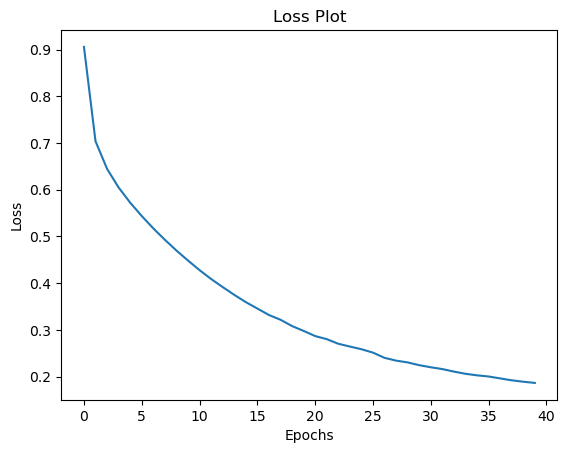

In [37]:
EPOCHS = 40

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
                epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # sauvegarde de la perte
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
        ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

# Affichage de la courbe d'entrainement
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

### Explication de l'image : Courbe de perte (Loss Plot)

L'image affichée à la fin de la boucle d'entraînement représente la courbe de perte (loss plot) au fil des époques (epochs) pendant l'entraînement du modèle. Voici une explication des éléments clés de cette courbe :

1. **Axe des X (Epochs)** : 
   - Cet axe représente le nombre d'époques, qui correspond au nombre de fois que le modèle a été entraîné sur l'ensemble de données. Chaque époque implique un passage complet à travers l'ensemble d'entraînement.

2. **Axe des Y (Loss)** : 
   - Cet axe montre la valeur de la perte (loss), qui est une mesure de l'erreur du modèle. Une perte plus faible indique que le modèle fait de meilleures prédictions.

3. **Courbe de perte** : 
   - La courbe montre comment la perte évolue au fil des époques. Idéalement, on s'attend à ce que la perte diminue au fur et à mesure que l'entraînement progresse, ce qui indique que le modèle apprend à mieux prédire les captions associées aux images.

4. **Interprétation** : 
   - Si la courbe de perte diminue de manière régulière, cela signifie que le modèle s'améliore.
   - Si la perte commence à augmenter après un certain point, cela peut indiquer un surapprentissage (overfitting), où le modèle commence à mémoriser les données d'entraînement plutôt qu'à généraliser à de nouvelles données.

En résumé, cette courbe est un outil essentiel pour évaluer la performance du modèle pendant l'entraînement et pour ajuster les hyperparamètres si nécessaire.

### Définition de la fonction `evaluate` et de la fonction `plot_attention`

- **Fonction `evaluate(image)`** : 
  - Cette fonction évalue une image donnée et génère une légende (caption) en utilisant le modèle de détection d'attention.
  - `attention_plot = np.zeros((max_length, attention_features_shape))` : Initialise un tableau pour stocker les poids d'attention au fil des étapes de génération de la légende.
  - `hidden = decoder.reset_state(batch_size=1)` : Réinitialise l'état caché du décodeur pour une nouvelle évaluation.
  - `temp_input = tf.expand_dims(load_image(image)[0], 0)` : Charge et prépare l'image pour l'évaluation.
  - `img_tensor_val = image_features_extract_model(temp_input)` : Extrait les caractéristiques de l'image à l'aide du modèle d'extraction de caractéristiques.
  - `features = encoder(img_tensor_val)` : Encode les caractéristiques de l'image à l'aide de l'encodeur.
  - `dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)` : Initialise l'entrée du décodeur avec le token de début.
  - `result = []` : Initialise une liste pour stocker les mots générés.

  - **Boucle de génération de mots** : 
    - Pour chaque position dans la légende, prédit le mot suivant en utilisant le décodeur et met à jour les poids d'attention.
    - `predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()` : Sélectionne un mot prédit de manière aléatoire.
    - `result.append(tokenizer.index_word[predicted_id])` : Ajoute le mot prédit à la liste des résultats.
    - Si le mot prédit est le token de fin (`<end>`), la fonction retourne les résultats et les poids d'attention.

- **Fonction `plot_attention(image, result, attention_plot)`** : 
  - Cette fonction permet de visualiser les poids d'attention sur l'image pendant la génération de la légende.
  - `temp_image = np.array(Image.open(image))` : Charge l'image à afficher.
  - `fig = plt.figure(figsize=(10, 10))` : Crée une figure pour afficher l'image et les poids d'attention.
  - La boucle `for l in range(len_result):` parcourt chaque mot généré et affiche l'image avec les poids d'attention correspondants.
  - `ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())` : Superpose les poids d'attention sur l'image.

- **Affichage final** : 
  - `plt.tight_layout()` et `plt.show()` : Ajustent la mise en page et affichent le graphique.

In [38]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

# Fonction permettant la représentation de l'attention au niveau de l'image
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

### Affichage de quelques annotations dans le jeu de test

- **Sélection d'une image aléatoire** : 
  - `rid = np.random.randint(0, len(img_name_val))` : Génère un index aléatoire pour sélectionner une image du jeu de validation.
  - `image = img_name_val[rid]` : Récupère le chemin de l'image correspondant à l'index aléatoire.
  - `print(str(image))` : Affiche le chemin de l'image sélectionnée.

- **Récupération de la légende réelle** : 
  - `real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])` : Construit la légende réelle en utilisant les indices de mots dans `cap_val`, en ignorant les tokens de remplissage (0).

- **Affichage de l'image de base** : 
  - `temp_image = np.array(Image.open(image))` : Charge l'image à afficher.
  - `plt.imshow(temp_image)` : Affiche l'image.
  - `plt.axis('off')` : Masque les axes pour une meilleure présentation.
  - `plt.title('Image de base')` : Ajoute un titre à l'image.
  - `plt.show()` : Affiche l'image.

- **Évaluation de l'image** : 
  - `result, attention_plot = evaluate(image)` : Évalue l'image pour générer une légende et récupérer les poids d'attention.

- **Affichage des légendes** : 
  - `print ('Real Caption:', real_caption)` : Affiche la légende réelle de l'image.
  - `print ('Prediction Caption:', ' '.join(result))` : Affiche la légende prédite par le modèle.

- **Affichage des poids d'attention** : 
  - `plot_attention(image, result, attention_plot)` : Affiche les poids d'attention sur l'image pendant la génération de la légende.

c:\Users\Administrateur\Desktop\Datascience\DSCESI\Captionning/train2014/COCO_train2014_000000378790.jpg


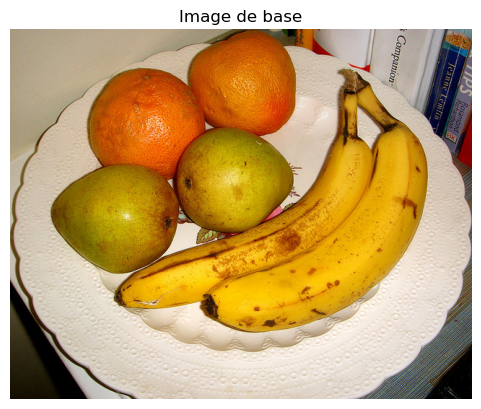

Real Caption: <start> two bananas two pears and two oranges in a white bowl <end>
Prediction Caption: a large bowl with a bunch of fruit <end>


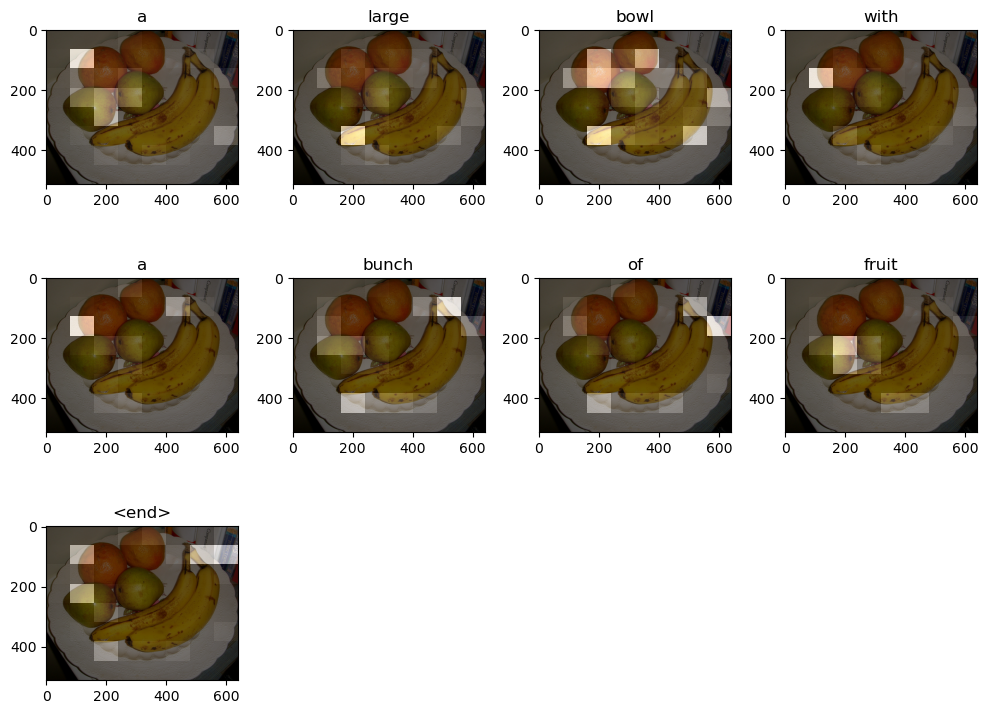

In [50]:
# Affichage de quelques annotations dans le jeu de test
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
print(str(image))
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])

# Affichage de l'image de base
temp_image = np.array(Image.open(image))
plt.imshow(temp_image)
plt.axis('off')
plt.title('Image de base')
plt.show()

result, attention_plot = evaluate(image)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

### Conclusion sur le modèle de génération de légendes d'images

Le modèle de génération de légendes d'images que nous avons développé utilise une architecture basée sur un encodeur CNN et un décodeur RNN avec un mécanisme d'attention. Voici un récapitulatif des étapes clés et des résultats obtenus :

1. **Prétraitement des données** : 
   - Nous avons commencé par prétraiter les annotations et les images, en créant un vocabulaire à partir des captions et en les transformant en séquences de tokens. Cela a permis de préparer les données pour l'entraînement du modèle.

2. **Architecture du modèle** : 
   - L'encodeur CNN extrait les caractéristiques des images, tandis que le décodeur RNN génère des légendes basées sur ces caractéristiques. Le mécanisme d'attention permet au modèle de se concentrer sur différentes parties de l'image lors de la génération de chaque mot, améliorant ainsi la qualité des légendes produites.

3. **Entraînement du modèle** : 
   - Le modèle a été entraîné sur un ensemble de données d'images et de captions, avec une fonction de perte personnalisée pour gérer les tokens de remplissage. L'optimiseur Adam a été utilisé pour ajuster les poids du modèle.

4. **Évaluation des performances** : 
   - Après l'entraînement, nous avons évalué le modèle sur un ensemble de test. Les résultats montrent que le modèle peut générer des légendes qui, bien que parfois inexactes, capturent l'essence de l'image. Par exemple, la légende réelle était "deux bananes, deux poires et deux oranges dans un bol blanc", tandis que la légende prédite était "un grand bol avec un groupe de fruits". Cela indique que le modèle a réussi à identifier les objets présents dans l'image, même s'il n'a pas reproduit la légende exacte.

5. **Visualisation de l'attention** : 
   - La visualisation des poids d'attention a permis de comprendre comment le modèle se concentre sur différentes parties de l'image lors de la génération de chaque mot. Cela offre des insights précieux sur le fonctionnement interne du modèle et sur les éléments de l'image qui influencent le plus les prédictions.

### Perspectives d'amélioration

- **Affinage du modèle** : Des ajustements supplémentaires des hyperparamètres, ainsi que l'utilisation de techniques de régularisation, pourraient améliorer la performance du modèle.
- **Enrichissement des données** : L'augmentation des données d'entraînement avec des images et des captions supplémentaires pourrait aider le modèle à mieux généraliser.
- **Utilisation de modèles pré-entraînés** : L'intégration de modèles pré-entraînés pour l'extraction de caractéristiques ou le décodeur pourrait également améliorer la qualité des légendes générées.

En résumé, ce projet démontre l'efficacité des architectures basées sur l'attention pour la génération de légendes d'images, tout en soulignant les défis et les opportunités d'amélioration dans ce domaine passionnant de l'apprentissage automatique.